# Binning

In [1]:
# we will be studying to numerical data to categorical data

# we have two techniques to do so
# the first technique is Discritizatioin (binning)
# the second technique is Binarization


## Discretization

In [2]:

"""  

# its the processs of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. It's also called  binning, where bin is an alternative name for interval.

# we use it to handleo utliers, and to improve the value spread


Three types of binninng
1/ unsupervised binning
    i/ equal width binning
        - here you put all the numerical values into bins
        - useful for handling outlieres
        - no changes btwn original data histogram and after binning data histogram while plotting it

    ii/ equal frequency binning / quantile binning
        - suppose you want 10 bins on the data, then you must make sure that each interval must contain 10% of total observaions
        - here the width of the intervals may not be equal
        - useful for handling ourliers
        - makes the values spread uniform (all histogram bars will be equal)
        - HIGHLY USED

    iii/ k means binning
        - here you use a clustering algorithm called k means
        - mostly used when the data is divided into many clusters
        - here intervals are called as centroids
        - suppose you want 5 intervals


2/ supervised binning
    i/ decision tree binning
3/ custom binning




"""




"  \n\n# its the processs of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. It's also called  binning, where bin is an alternative name for interval.\n\n# we use it to handleo utliers, and to improve the value spread\n\n\nThree types of binninng\n1/ unsupervised binning\n    i/ equal width binning\n        - here you put all the numerical values into bins\n        - useful for handling outlieres\n        - no changes btwn original data histogram and after binning data histogram while plotting it\n\n    ii/ equal frequency binning / quantile binning\n        - suppose you want 10 bins on the data, then you must make sure that each interval must contain 10% of total observaions\n        - here the width of the intervals may not be equal\n        - useful for handling ourliers\n        - makes the values spread uniform (all histogram bars will be equal)\n        - HIGHLY USED\n\n    iii/ k m

## K means binning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_scoremk
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer              # for k means binning
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')       # this removes all the warnings that you get while coding

In [4]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df = df.dropna()
print(df.shape)
df.head(3)

(714, 3)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [5]:
x = df.drop(columns='Survived')
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(f"Accuracy : {np.round(accuracy_score(y_test, y_pred),2)*100} %")
print(f"Cross val : {np.round(np.mean(cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')),2)*100} %")


Accuracy : 62.0 %
Cross val : 65.0 %


applying k means discritizer

In [ ]:
# applying discritizer

kbin_age = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')   
# other things you can put instead of 'quantile' ----- 'uniform' (equal-width) [(max - min) / n_bins], 'quantile' (equal-frequency), 'kmeans' (clustering-based)
kbin_fare = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile')

trf = ColumnTransformer([
    ('first', kbin_age, [0]),       # will take the first column passed in the dataset
    ('second', kbin_fare, [1])      # will take the second column passed in the dataset
])

x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

print(f"checking number of bins : {trf.named_transformers_['first'].n_bins_}")
print(f"checking edges of bins : \n{trf.named_transformers_['first'].bin_edges_}\n")

output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf': x_train_trf[:, 0],
    'fare': x_train['Fare'],
    'fare_trf': x_train_trf[:,1]
})

output


checking number of bins : [15]
checking edges of bins : 
[array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
        32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ]



,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [7]:
x_train_trf = pd.DataFrame(x_train_trf, columns=x_train.columns)

print(x_train_trf['Age'].unique())
print(x_train_trf['Fare'].unique())

[ 8.  6.  9. 11.  4. 12.  2.  7.  1. 13.  5.  3. 14.  0. 10.]
[ 8.  7.  2.  6. 10.  3.  4.  0.  1. 11. 12. 14. 13.  9.  5.]


In [8]:
output['age_labels'] = pd.cut(df['Age'], bins=trf.named_transformers_['first'].bin_edges_[0].tolist())

output['fare_labels'] = pd.cut(df['Fare'], bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

output

# down below age_labels and fare_labels shows the range in shich the numberes lie from age and fare column

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(18.75, 26.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(13.0, 14.454]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(14.454, 18.75]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(7.25, 7.775]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
...,...,...,...,...,...,...
92,46.0,12.0,61.1750,12.0,"(42.0, 47.0]","(51.479, 76.292]"
134,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(10.5, 13.0]"
337,41.0,11.0,134.5000,14.0,"(38.0, 42.0]","(108.9, 512.329]"
548,33.0,9.0,20.5250,8.0,"(32.0, 35.0]","(18.75, 26.0]"


In [9]:
# using decision tree on transformed data
clf = DecisionTreeClassifier()
clf.fit(x_train_trf, y_train)
y_pred2 = clf.predict(x_test_trf)

print(f"Accuracy : {np.round(accuracy_score(y_test, y_pred2), 2)*100} %")
print(f"Cross Val : {np.mean(np.round(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'), 2)*100)} %")


Accuracy : 64.0 %
Cross Val : 63.5 %


Plotting quantile
Cross Val : 63.4 %


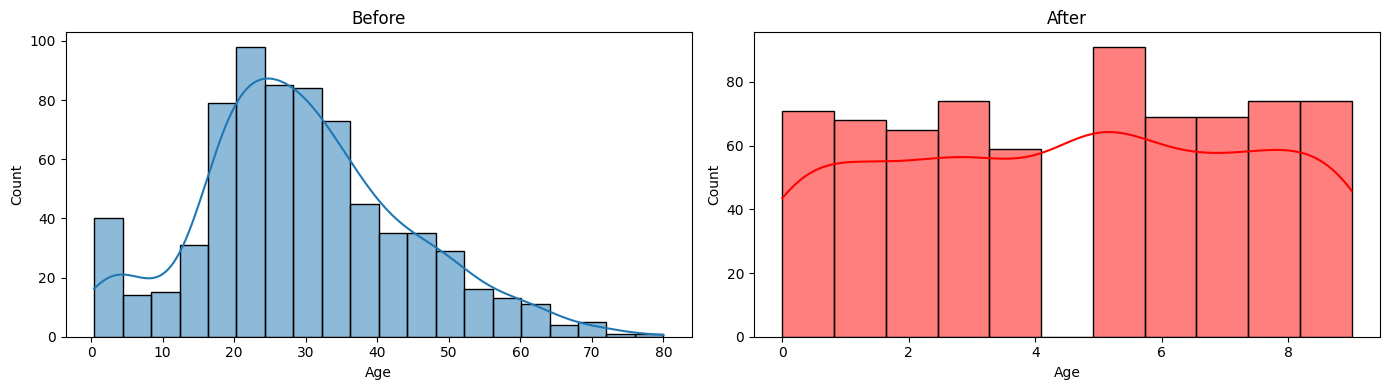

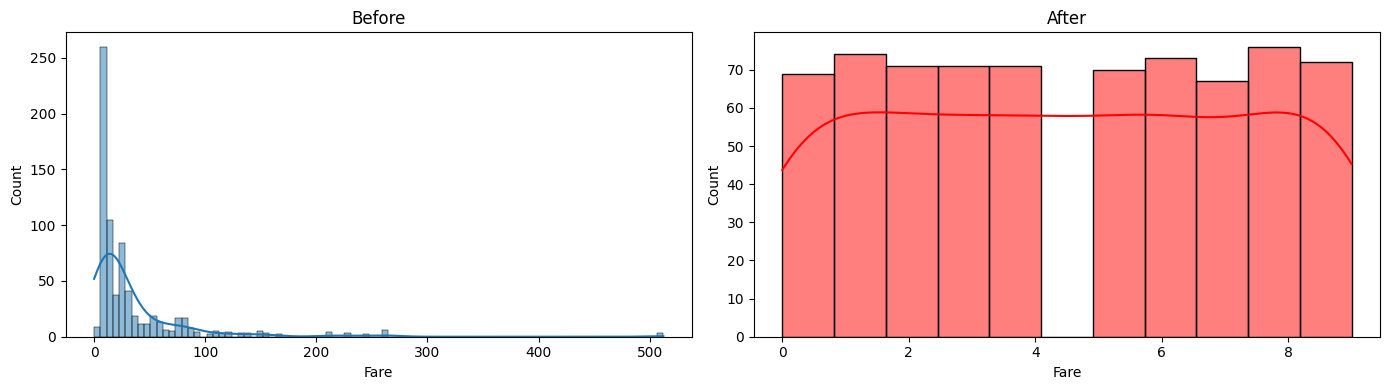

Plotting uniform
Cross Val : 63.0 %


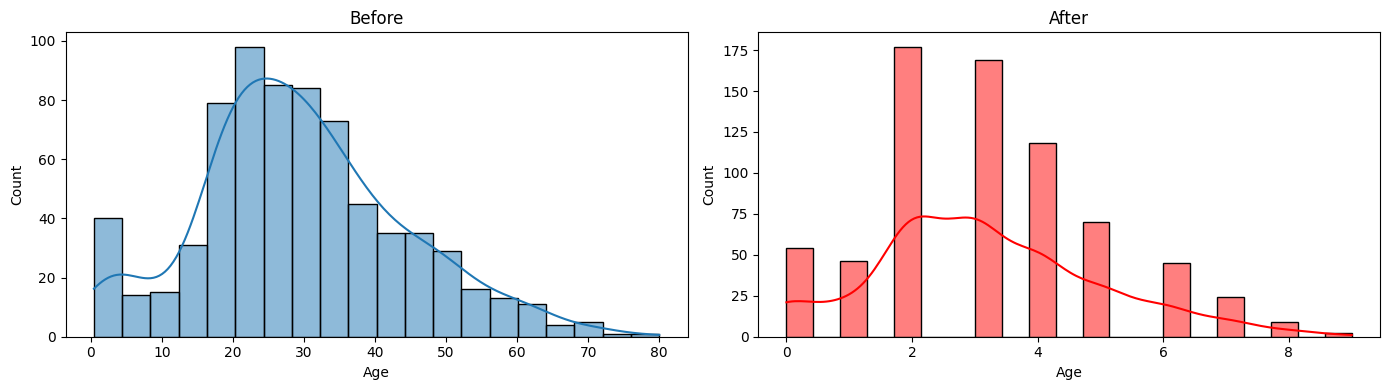

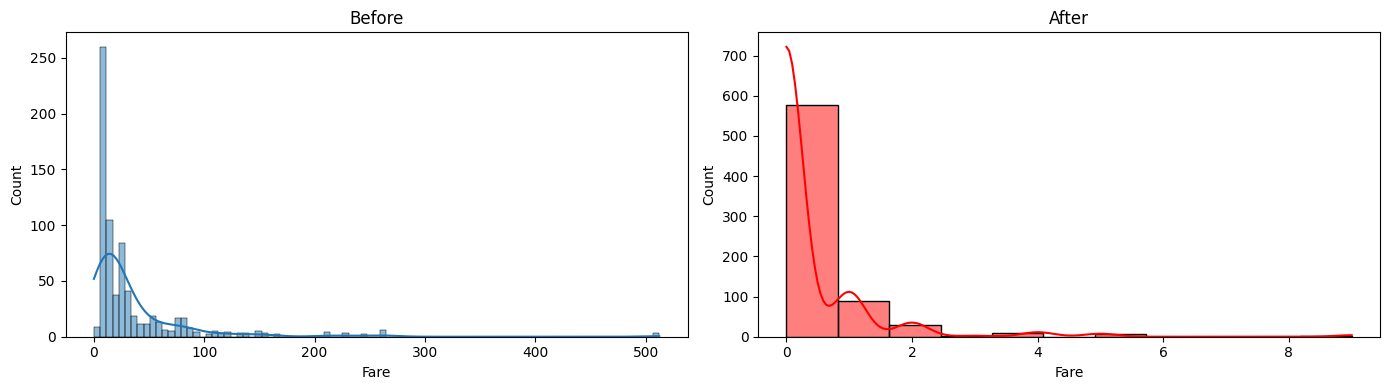

Plotting kmeans
Cross Val : 62.8 %


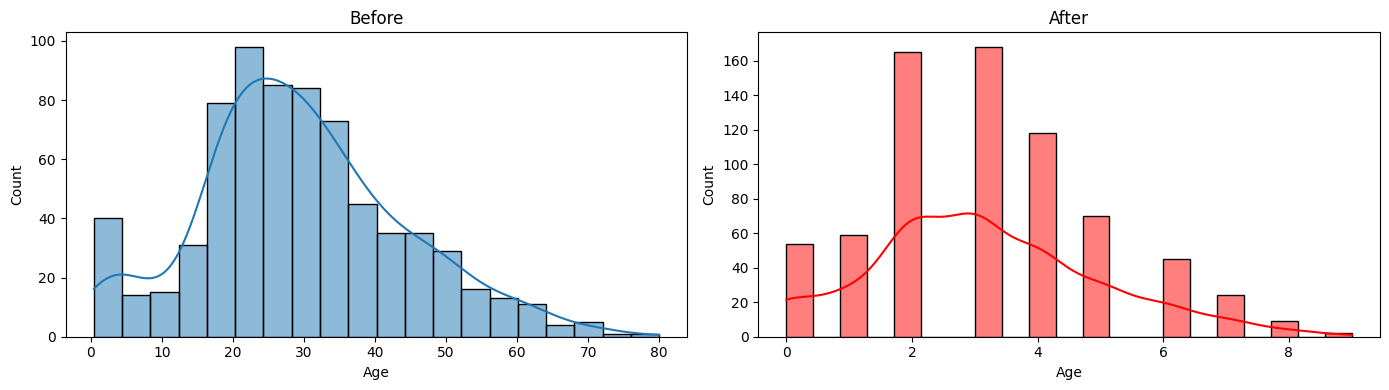

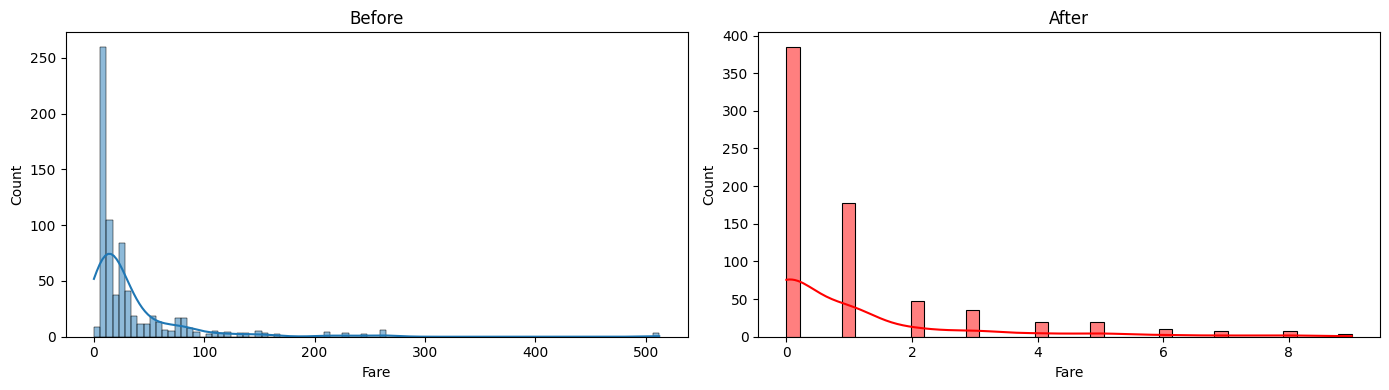

In [10]:
# making a function that will calculate accuracy and also plot the graphs
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)   
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),       
        ('second', kbin_fare, [1])     
    ])

    x_trf = trf.fit_transform(x)
    x_trf = pd.DataFrame(x_trf, columns=x.columns)

    print(f"Cross Val : {np.mean(np.round(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'), 2)*100)} %")


    for col in x.columns:

        plt.figure(figsize=(14,4))
        plt.subplot(121)
        sns.histplot(x[col], kde=True)
        plt.title('Before')

        plt.subplot(122)
        sns.histplot(x_trf[col], kde=True, color='red')
        plt.title('After')

        plt.tight_layout()
        plt.show()

# calling the function
print("Plotting quantile")
discretize(10, 'quantile')

print("Plotting uniform")
discretize(10, 'uniform')

print("Plotting kmeans")
discretize(10, 'kmeans')





# KBinsDiscretizer vs KMeans

## KBinsDiscretizer

**KBinsDiscretizer** is a scikit-learn tool used to convert continuous numeric features into discrete bins. This process is called "binning" or "discretization." You specify how many bins you want, and the data is divided into these intervals. Each value is then assigned a bin number as a label.

- **When to use:**  
  Use KBinsDiscretizer when you want to turn a continuous variable into categories, for example, to simplify features before using algorithms that work better with categorical data (such as some tree models or when you need to reduce the granularity of features).
- **Where to use:**  
  Common in feature engineering for machine learning, especially when prepping data for models that don’t naturally handle continuous inputs well, or when you need to create ordinal categories.
- **How to use:**  
  Choose how to define bins—by equal width, equal frequency ('quantile'), or even using k-means on a single feature ('kmeans' strategy). Fit the discretizer to your data, and transform your features into bin labels.

**Example:**
```python
from sklearn.preprocessing import KBinsDiscretizer
X = [, , , , ]​
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
print(kbd.fit_transform(X))
```
This splits your data into three intervals, assigning each value to its corresponding bin.

---

## KMeans

**KMeans** is a clustering algorithm used to group data into a specified number of clusters. It works on multidimensional data and tries to find cluster centers such that each data point belongs to the nearest cluster center. Unlike KBinsDiscretizer, KMeans pays attention to the shape and distribution of the data.

- **When to use:**  
  Use KMeans when you want to discover natural groupings within your data, often for analysis, customer segmentation, anomaly detection, or unsupervised learning tasks.
- **Where to use:**  
  Applies to exploratory data analysis, image segmentation, grouping customers by behavior, or anytime you believe your features might naturally fall into groups.
- **How to use:**  
  Decide the number of clusters (`n_clusters`) you expect. Fit the model to your data, and it will assign a cluster label to each point, as well as return the coordinates of the cluster centroids.

**Example:**
```python
from sklearn.cluster import KMeans
X = [, , , , , , ]​
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
print(labels)
print(kmeans.cluster_centers_)
```

This will find 3 cluster centroids and assign each data point to a cluster.

---

## Practical Advice

- Use **KBinsDiscretizer** for feature engineering—when turning continuous values into ordered categories.
- Use **KMeans** for unsupervised clustering and pattern discovery, especially in multi-feature datasets.
- KBinsDiscretizer bins evenly or by frequency; KMeans adapts clusters to data shape and density.
- Both can be used for data preprocessing, but their purpose is quite different: discretization versus grouping.

If you want to learn about natural groups in your data—choose KMeans. If you want simpler categories out of continuous data—choose KBinsDiscretizer.

---
---
---

# KBinsDiscretizer vs KMeans: Difference When Applied to Separate Features

Suppose you have two features, `feature_A` and `feature_B`:

- On **feature_A**, you apply **KBinsDiscretizer**
- On **feature_B**, you apply **KMeans**

---

## What happens to each feature?

**KBinsDiscretizer on feature_A:**
- Splits the values of `feature_A` into fixed intervals (bins).
- Every value is replaced with the bin label it falls into.
- All values in each interval receive the same label.
- The bins are based only on the values in `feature_A`, without considering other features.

**KMeans on feature_B:**
- Groups the values of `feature_B` into clusters based on their similarity.
- Assigns each value to the nearest cluster center.
- Clusters can have different sizes and are adapted to the shape of the data in `feature_B`.
- Unlike KBinsDiscretizer, KMeans groups are “learned” from the data distribution, not fixed intervals.

**KBinsDiscretizer splits the data into bins, while KMeans splits the data into clusters.**

---

## Key Differences

- **Bins vs. Clusters:**  
  KBinsDiscretizer creates bins with user-defined edges (equal width, quantile, or using kmeans strategy), while KMeans finds clusters that best fit the data's shape and density.

- **Usage:**  
  KBinsDiscretizer is mainly for converting continuous data into categorical bins — good for feature engineering.  
  KMeans is used to find underlying groupings and structure within the data — good for exploratory analysis and **unsupervised learning**.

- **Outcome:**  
  The binned feature will have ordered categories (bin labels), possibly with a loss of some data granularity.  
  The clustered feature will have arbitrary group labels, based on proximity to cluster centers.

---

## Example code
```python
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans

# Example data for two features
feature_A = np.array([, , , , ]).reshape(-1, 1)
feature_B = np.array([, , , , ]).reshape(-1, 1)

# KBins on feature_A
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned_A = kbd.fit_transform(feature_A)
print("KBinsDiscretizer labels for feature_A:", binned_A.ravel())

# KMeans on feature_B
kmeans = KMeans(n_clusters=3, random_state=42)
clustered_B = kmeans.fit_predict(feature_B)
print("KMeans clusters for feature_B:", clustered_B)
```

**Conclusion:**  
- KBinsDiscretizer turns feature_A into fixed intervals; each bin gets a label.
- KMeans finds groups in feature_B that are shaped by the data, not fixed intervals.
- The kind of transformation you use depends on whether you want structured categories (bins) or discover meaningful groupings (clusters) in your data.

---
---
---

# KBinsDiscretizer vs KMeans: When to use ???

**There isn’t a single “best” choice — both KBinsDiscretizer and KMeans serve different purposes and should be chosen based on your data and problem:**

## KBinsDiscretizer

- **Best for:**  
  - Feature engineering when you need to convert continuous features into discrete categories or bins.
  - Models that work better with categorical inputs (like decision trees and some rule-based algorithms).
  - Simplifying feature ranges, reducing noise, or making interpretation easier.

- **Limitations:**  
  - Can lose some granularity in data — precision is replaced by category assignment.
  - Not useful for uncovering hidden patterns or grouping data.

## KMeans

- **Best for:**  
  - Discovering natural groups, patterns, or segments in your data, especially in unsupervised settings.
  - Clustering for customer segmentation, anomaly detection, or extracting features for later supervised learning.
  - Working with multi-dimensional data where relationships aren’t strictly linear or based on value ranges.

- **Limitations:**  
  - Requires selection of number of clusters (`k`), which can be tricky.
  - Can be sensitive to outliers and initial centroids.
  - Outputs arbitrary cluster labels (not true categories).

---

## Practical Advice

- **Use KBinsDiscretizer:**  
  When your goal is to prepare your data for supervised models, simplify continuous variables, or make your features categorical for interpretability.

- **Use KMeans:**  
  When your goal is to explore your data, discover unknown groupings, or segment data without supervision.

- **Real-World Tip:**  
  Often, KBinsDiscretizer is used as part of feature engineering in a machine learning pipeline, while KMeans is used for exploratory data analysis, clustering, and even feature extraction (using cluster labels as new features).

**The best tool depends on your problem:**  
- If you need simple categories — use KBinsDiscretizer.  
- If you want to uncover groups and learn from patterns — use KMeans.

Most real-world ML workflows use both types of tools at different stages!


---
---
---

# Methods to Choose Clusters Automatically

KMeans requires `n_clusters`, but the following techniques can automatically find the best number of clusters and remove human error.

---

## 1. Elbow Method (Automated)

Evaluates SSE (inertia) for different values of `k`.  
The “elbow point” indicates the optimal cluster count.

```python
from sklearn.cluster import KMeans
import numpy as np

def find_optimal_k_elbow(X, max_k=15):
    sse = []
    for k in range(1, max_k+1):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X)
        sse.append(km.inertia_)
    deltas = np.diff(sse)
    k_opt = np.argmin(deltas) + 1
    return k_opt
```

## 2. Silhouette Score Method (Recommended)

Chooses the `k` that gives the highest silhouette score (best separation between clusters).

```python
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def find_optimal_k_silhouette(X, max_k=15):
    best_score = -1
    best_k = 2
    for k in range(2, max_k+1):
        km = KMeans(n_clusters=k, random_state=42).fit(X)
        score = silhouette_score(X, km.labels_)
        if score > best_score:
            best_score = score
            best_k = k
    return best_k
```

## 3. X-Means (Fully Automatic)

Automatically expands clusters without manually selecting `k`.
Not included in scikit-learn; available in `pyclustering`.

```python
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

initial_centers = kmeans_plusplus_initializer(data, 2).initialize()
xm = xmeans(data, initial_centers, kmax=20)
xm.process()
clusters = xm.get_clusters()
```

## 4. Gaussian Mixture Model (GMM) with BIC/AIC

Chooses the cluster count with the lowest BIC (or AIC).
More flexible than KMeans since it models distributions.

```python
from sklearn.mixture import GaussianMixture

def find_optimal_k_gmm(X, max_k=15):
    lowest_bic = float('inf')
    best_k = 1
    for k in range(1, max_k+1):
        gmm = GaussianMixture(n_components=k, random_state=42).fit(X)
        bic = gmm.bic(X)
        if bic < lowest_bic:
            lowest_bic = bic
            best_k = k
    return best_k
```